In [1]:
import numpy as np
from bs4 import BeautifulSoup

## Useful functions
---

In [2]:
def display_svg(data):
    from IPython.display import SVG, display
    display(SVG(data))

In [3]:
def export_svg(data, filename):
    f = open(f'{filename}.svg', "w")
    f.write(data)
    f.close()

## Read template
---
Read template file `template.svg` from Illustrator and parse object.

In [4]:
f = open("template.svg", "r")
parse = BeautifulSoup(f.read(), 'html.parser')
f.close()

## Set SVG elements
---

In [5]:
# SVG
svg = parse.find("svg")

del svg["viewbox"]
svg["width"] = "360px"
svg["height"] = "480px"
svg["xmlns"] = "http://www.w3.org/2000/svg"
svg["xmlns:xlink"] = "http://www.w3.org/1999/xlink"

# defs
defs = svg.find("defs")

# style
style = defs.find("style")
style.string += '''
.word > * {
    fill: none;
    stroke-width: 1px;
    stroke-linecap: round;
    mix-blend-mode: overlay;
}
'''

# title
title = svg.find("title")
title.string = "README Image"

In [6]:
np.random.seed(1)

# word cloud
word_cloud = svg.find("g", {"id": "word_cloud"})
defs.append(word_cloud)

WORDS = word_cloud.findAll("g")
for word in WORDS:
    word.name = "symbol"
    word["class"] = "word"
    
    for i in range(5):
        use = parse.new_tag("use")
        use["href"] = f'#{word["id"]}'
        h = np.random.randint(360)
        use["style"] = f'stroke: hsl({h}, 70%, 50%)'
        dao = np.random.randint(20, 31)
        dai = np.random.randint(20, 51)
        use["stroke-dasharray"] = f'{dao} {dai}'
        svg.append(use)
        animate = parse.new_tag("animate")
        animate["attributeName"] = "stroke-dashoffset"
        animate["repeatCount"] = "indefinite"
        value = np.random.choice([-(dao + dai), dao + dai])
        animate["values"] = f'0;{value}'
        dur = np.random.random()*3 + 2
        animate["dur"] = f'{dur:.03f}s'
        begin = np.random.random()*dur
        animate["begin"] = f'-{begin:.03f}s'
        use.append(animate)

## Display SVG
---

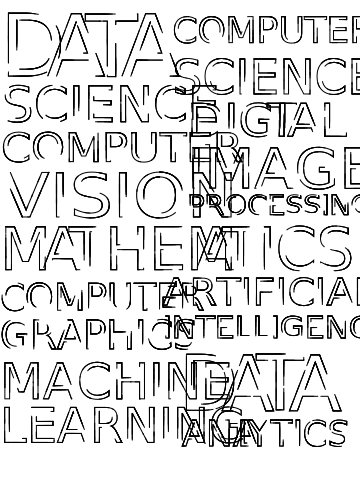

In [7]:
display_svg(str(svg))

## Export SVG
---

In [8]:
# svg_out = f'''
# <?xml version="1.0" encoding="utf-8"?>
# <!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
# {svg.prettify()}
# '''

# export_svg(svg_out, "image")